# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []


In [4]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hargeysa
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | prado
Processing Record 4 of Set 1 | nova odesa
Processing Record 5 of Set 1 | axum
Processing Record 6 of Set 1 | mozhga
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | luancheng
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | dok kham tai
Processing Record 13 of Set 1 | doume
Processing Record 14 of Set 1 | ligaya
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | sinabang
Processing Record 18 of Set 1 | bargara
City not found. Skipping...
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | kapa'a
Processing Record 21 of Set 1 | thompson
Processing Record 2

Processing Record 40 of Set 4 | egilsstadir
Processing Record 41 of Set 4 | cururupu
Processing Record 42 of Set 4 | huarmey
Processing Record 43 of Set 4 | payyannur
Processing Record 44 of Set 4 | acarau
Processing Record 45 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 46 of Set 4 | jaisalmer
Processing Record 47 of Set 4 | kalsdorf bei graz
Processing Record 48 of Set 4 | saipan
Processing Record 49 of Set 4 | axim
Processing Record 0 of Set 5 | varkaus
Processing Record 1 of Set 5 | nuevitas
Processing Record 2 of Set 5 | ghat
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | llanes
Processing Record 6 of Set 5 | imst
Processing Record 7 of Set 5 | nizhniy odes
Processing Record 8 of Set 5 | chonchi
Processing Record 9 of Set 5 | oleszyce
Processing Record 10 of Set 5 | isafjordur
Processing Record 11 of Set 5 | island harbour
Processing Record 12 of Set 5 | bondo
Processing Record 13 of Set 5 |

Processing Record 32 of Set 8 | o rosal
Processing Record 33 of Set 8 | chifeng
Processing Record 34 of Set 8 | kailua-kona
Processing Record 35 of Set 8 | cannonvale
Processing Record 36 of Set 8 | nova olimpia
Processing Record 37 of Set 8 | labuan
Processing Record 38 of Set 8 | kudymkar
Processing Record 39 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 40 of Set 8 | zomba
Processing Record 41 of Set 8 | tobi village
City not found. Skipping...
Processing Record 42 of Set 8 | colares
Processing Record 43 of Set 8 | jayrud
Processing Record 44 of Set 8 | nuuk
Processing Record 45 of Set 8 | hayma'
City not found. Skipping...
Processing Record 46 of Set 8 | mandiana
Processing Record 47 of Set 8 | kataragama
City not found. Skipping...
Processing Record 48 of Set 8 | sao miguel do araguaia
Processing Record 49 of Set 8 | port hedland
Processing Record 0 of Set 9 | nogliki
Processing Record 1 of Set 9 | nasiriyah
Processing Record 2 of Set 9 | changji
Processing R

Processing Record 20 of Set 12 | deyang
Processing Record 21 of Set 12 | mobaye
Processing Record 22 of Set 12 | geraldton
Processing Record 23 of Set 12 | capinota
Processing Record 24 of Set 12 | gamawa
Processing Record 25 of Set 12 | mont-laurier
Processing Record 26 of Set 12 | vila franca do campo
Processing Record 27 of Set 12 | east ballina
Processing Record 28 of Set 12 | gizo
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | sheohar
Processing Record 31 of Set 12 | al qararah
Processing Record 32 of Set 12 | vernon
Processing Record 33 of Set 12 | kyabe
Processing Record 34 of Set 12 | tolanaro
Processing Record 35 of Set 12 | uacu cungo
Processing Record 36 of Set 12 | quellon
Processing Record 37 of Set 12 | trinidad
Processing Record 38 of Set 12 | hastings
Processing Record 39 of Set 12 | strezhevoy
Processing Record 40 of Set 12 | nioki
Processing Record 41 of Set 12 | cestos city
Processing Record 42 of Set 12 | robore
Processing Record 43 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hargeysa,9.5600,44.0650,26.21,44,80,13.70,SO,1690269561
1,puerto natales,-51.7236,-72.4875,-5.09,94,100,0.63,CL,1690269561
2,prado,-17.3411,-39.2208,19.66,96,74,2.31,BR,1690269307
3,nova odesa,47.3078,31.7851,28.95,45,48,7.68,UA,1690269562
4,axum,14.1245,38.7244,20.12,59,98,0.89,ET,1690269563


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hargeysa,9.5600,44.0650,26.21,44,80,13.70,SO,1690269561
1,puerto natales,-51.7236,-72.4875,-5.09,94,100,0.63,CL,1690269561
2,prado,-17.3411,-39.2208,19.66,96,74,2.31,BR,1690269307
3,nova odesa,47.3078,31.7851,28.95,45,48,7.68,UA,1690269562
4,axum,14.1245,38.7244,20.12,59,98,0.89,ET,1690269563


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

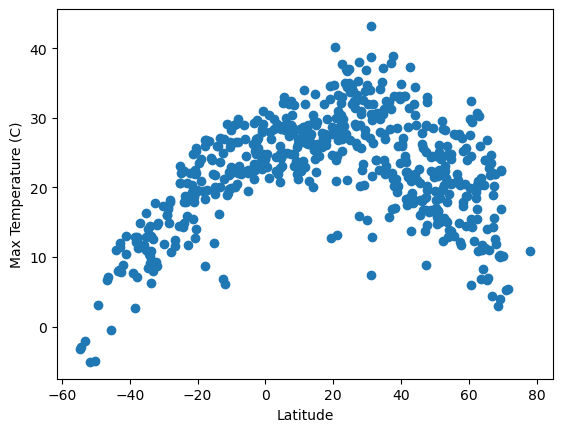

In [35]:
# Build scatter plot for latitude vs. temperature
lat=city_data_df['Lat']
temp=city_data_df['Max Temp']
plt.scatter(lat,temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

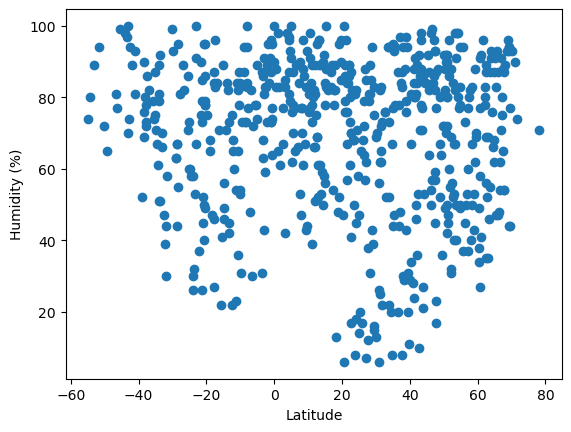

In [34]:
# Build the scatter plots for latitude vs. humidity
lat=city_data_df['Lat']
hum=city_data_df['Humidity']
plt.scatter(lat,hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

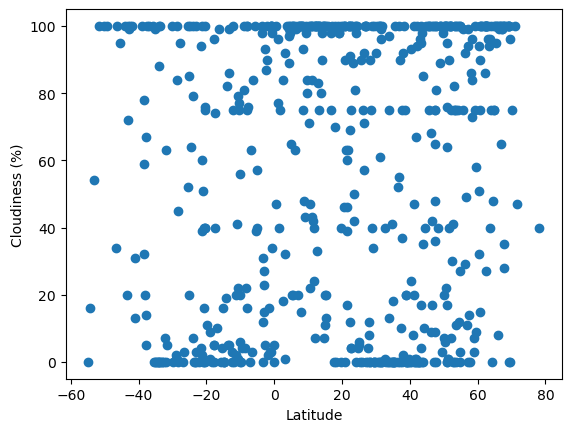

In [33]:
# Build the scatter plots for latitude vs. cloudiness
lat=city_data_df['Lat']
cloud=city_data_df['Cloudiness']
plt.scatter(lat,cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

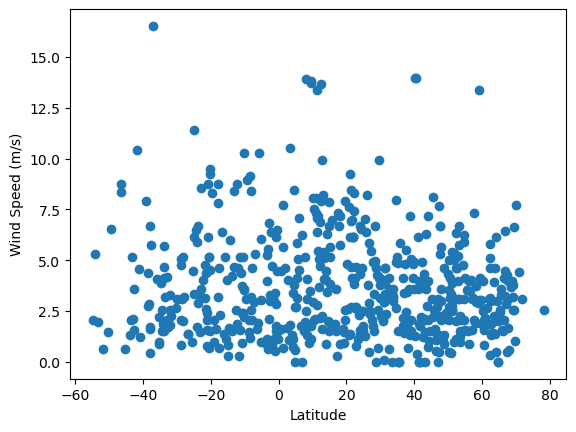

In [32]:
# Build the scatter plots for latitude vs. wind speed
lat=city_data_df['Lat']
wind=city_data_df['Wind Speed']
plt.scatter(lat,wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat'] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hargeysa,9.5600,44.0650,26.21,44,80,13.70,SO,1690269561
3,nova odesa,47.3078,31.7851,28.95,45,48,7.68,UA,1690269562
4,axum,14.1245,38.7244,20.12,59,98,0.89,ET,1690269563
5,mozhga,56.4447,52.2276,21.87,50,49,3.49,RU,1690269564
6,cabo san lucas,22.8909,-109.9124,29.78,82,100,2.68,MX,1690269564


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,-5.09,94,100,0.63,CL,1690269561
2,prado,-17.3411,-39.2208,19.66,96,74,2.31,BR,1690269307
7,waitangi,-43.9535,-176.5597,11.01,98,100,1.34,NZ,1690269565
8,margaret river,-33.9500,115.0667,14.43,89,100,4.15,AU,1690269565
10,port-aux-francais,-49.3500,70.2167,3.07,65,100,6.55,TF,1690269567


###  Temperature vs. Latitude Linear Regression Plot

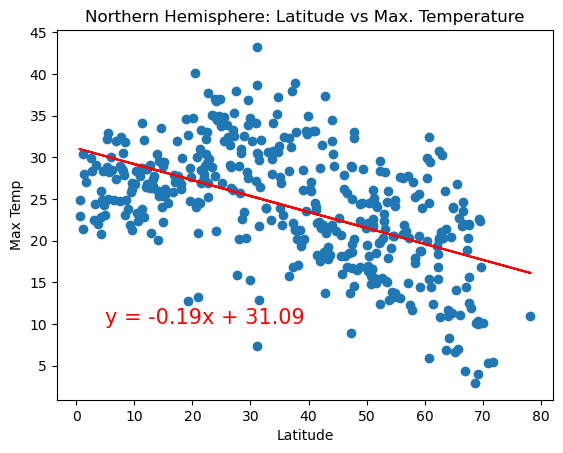

The r value is: -0.5310426193518465


In [24]:
# Linear regression on Northern Hemisphere
lat=northern_hemi_df['Lat']
temp=northern_hemi_df['Max Temp']
(slope,intercept,rvalue,pvalue,stderr)= linregress(lat,temp)
regress_val=lat * slope + intercept
plt.scatter(lat,temp)
plt.plot(lat,regress_val,'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere: Latitude vs Max. Temperature')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.show()
print(f"The r value is: {rvalue}")

There seems to be a weak to moderate negative correlation between Latitude and Maximum Temperature in the Northern Hemishphere. 
Therefore, we could assume the further away the Latitude of the city is to the equator the lowere the Maximum Temperature the city will have.

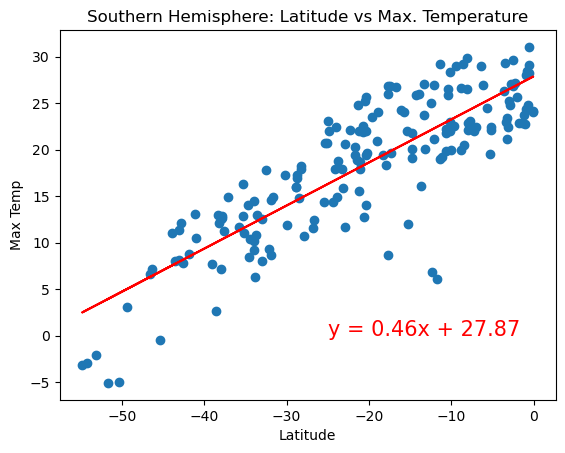

The r value is: 0.8439738838069003


In [25]:
# Linear regression on Southern Hemisphere
lat=southern_hemi_df['Lat']
temp=southern_hemi_df['Max Temp']
(slope,intercept,rvalue,pvalue,stderr)= linregress(lat,temp)
regress_val=lat * slope + intercept
plt.scatter(lat,temp)
plt.plot(lat,regress_val,'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere: Latitude vs Max. Temperature')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,0),fontsize=15,color="red")
plt.show()
print(f"The r value is: {rvalue}")

There seems to be a strong positive correlation between Latitude and Maximum Temperature in the Southern Hemishphere. Therefore, the closer the Latitude of the city is to the equator the higher the Maximum Temperature the city will have.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

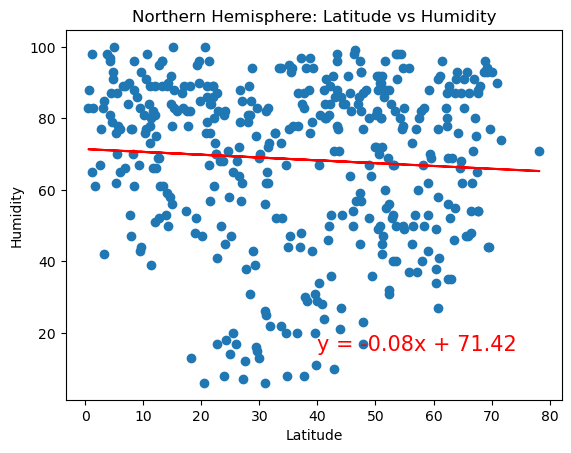

The r value is: -0.06735593049858782


In [26]:
# Northern Hemisphere
lat=northern_hemi_df['Lat']
hum=northern_hemi_df['Humidity']
(slope,intercept,rvalue,pvalue,stderr)= linregress(lat,hum)
regress_val=lat * slope + intercept
plt.scatter(lat,hum)
plt.plot(lat,regress_val,'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Latitude vs Humidity')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.show()
print(f"The r value is: {rvalue}")

There seems to be no type or strength of correlation between Latitude and Humidity in the Northern Hemisphere.

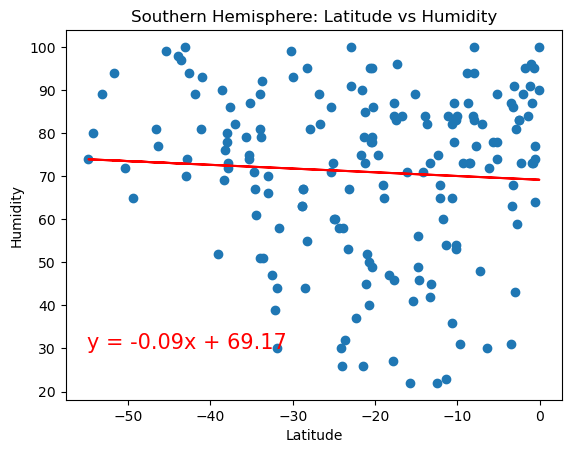

The r value is: -0.062109036574733066


In [27]:
# Southern Hemisphere
lat=southern_hemi_df['Lat']
hum=southern_hemi_df['Humidity']
(slope,intercept,rvalue,pvalue,stderr)= linregress(lat,hum)
regress_val=lat * slope + intercept
plt.scatter(lat,hum)
plt.plot(lat,regress_val,'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Latitude vs Humidity')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.show()
print(f"The r value is: {rvalue}")

There seems to be no type or strength of correlation between Latitude and Humidity in the Southern Hemisphere.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

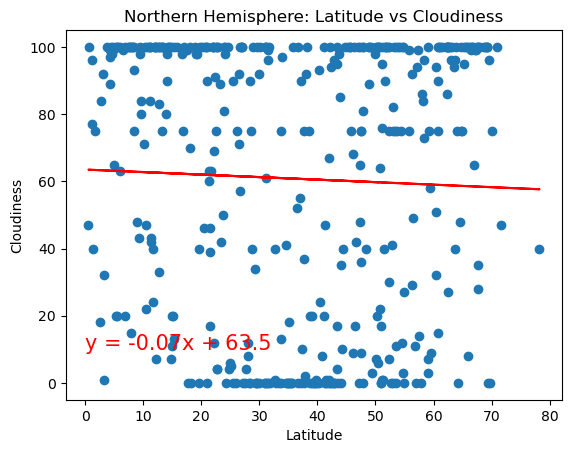

The r value is: -0.03614615142806993


In [28]:
# Northern Hemisphere
lat=northern_hemi_df['Lat']
cloud=northern_hemi_df['Cloudiness']
(slope,intercept,rvalue,pvalue,stderr)= linregress(lat,cloud)
regress_val=lat * slope + intercept
plt.scatter(lat,cloud)
plt.plot(lat,regress_val,'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Latitude vs Cloudiness')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.show()
print(f"The r value is: {rvalue}")

There seems to be no type or strength of correlation between Latitude and Cloudiness in the Northern Hemisphere.

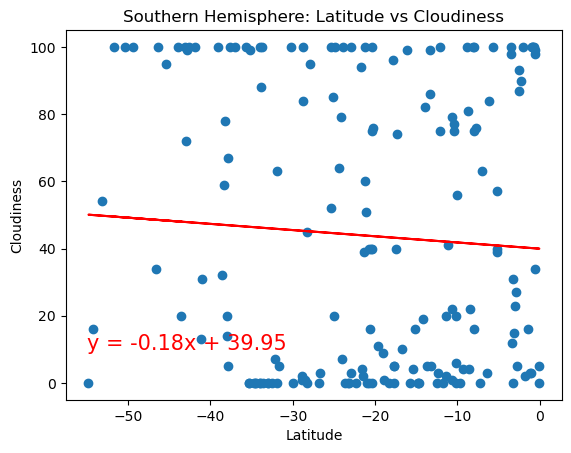

The r value is: -0.06236704695591411


In [29]:
#Southern Hemisphere
lat=southern_hemi_df['Lat']
cloud=southern_hemi_df['Cloudiness']
(slope,intercept,rvalue,pvalue,stderr)= linregress(lat,cloud)
regress_val=lat * slope + intercept
plt.scatter(lat,cloud)
plt.plot(lat,regress_val,'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Latitude vs Cloudiness')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.show()
print(f"The r value is: {rvalue}")

There seems to be no type or strength of correlation between Latitude and Cloudiness in the Southern Hemisphere.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

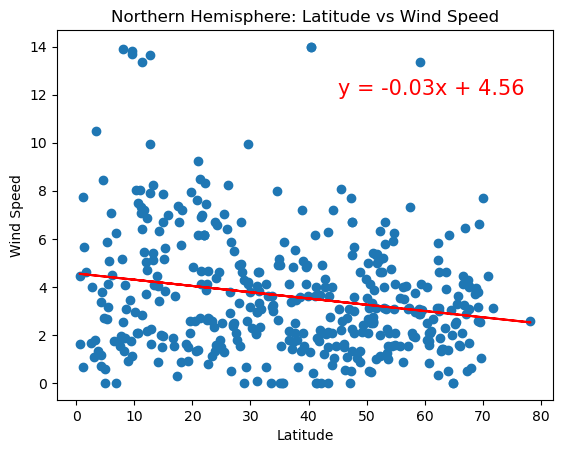

The r value is: -0.20093398797569845


In [30]:
# Northern Hemisphere
lat=northern_hemi_df['Lat']
wind=northern_hemi_df['Wind Speed']
(slope,intercept,rvalue,pvalue,stderr)= linregress(lat,wind)
regress_val=lat * slope + intercept
plt.scatter(lat,wind)
plt.plot(lat,regress_val,'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Latitude vs Wind Speed')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,12),fontsize=15,color="red")
plt.show()
print(f"The r value is: {rvalue}")

There seems to be no type or strength of correlation between Latitude and Wind Speed in the Northern Hemisphere.

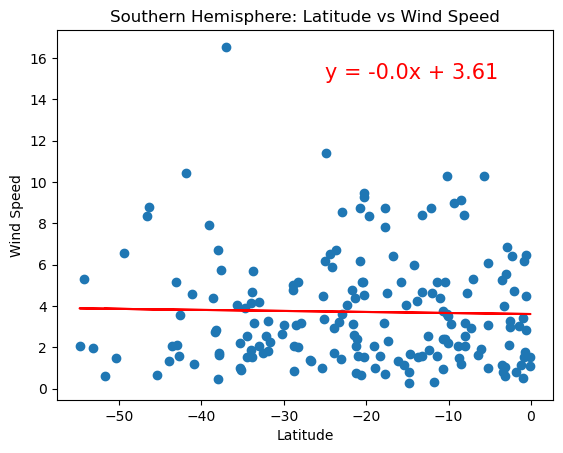

The r value is: -0.025818910032430583


In [31]:
# Southern Hemisphere
lat=southern_hemi_df['Lat']
wind=southern_hemi_df['Wind Speed']
(slope,intercept,rvalue,pvalue,stderr)= linregress(lat,wind)
regress_val=lat * slope + intercept
plt.scatter(lat,wind)
plt.plot(lat,regress_val,'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Latitude vs Wind Speed')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")

plt.show()
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There seems to be no type or strength of correlation between Latitude and Wind Speed in the Southern Hemisphere.